<a href="https://colab.research.google.com/github/CGproject-record/ppg_wave_find_peak_segment/blob/main/demo%20PPG%20signal%20data%20-%20find%20peak%20and%20segment%20wave%20final%20run%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import wfdb

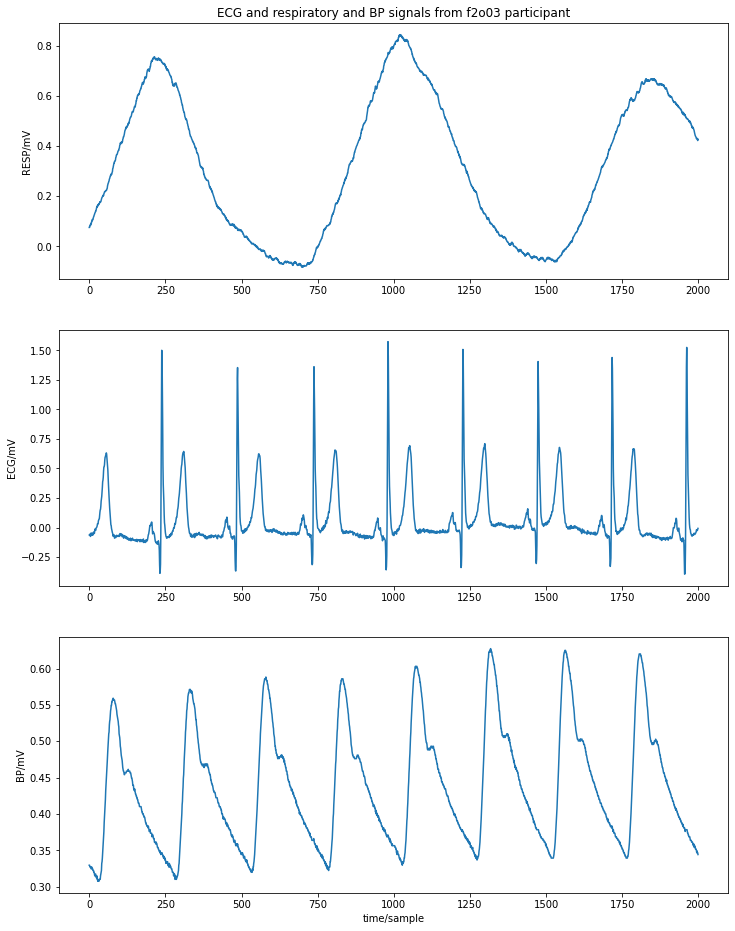

In [ ]:
# plot wave data from the patient
record = wfdb.rdrecord('f2o03', sampto=2000)
wfdb.plot_wfdb(record=record, title='ECG and respiratory and BP signals from f2o03 participant', figsize=(12,16))

In [ ]:
import pandas as pd
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
data, info = wfdb.rdsamp("f2o03")
df = pd.DataFrame(data, columns=info["sig_name"])
df

,RESP,ECG,BP
0,0.075684,-0.063477,0.329590
1,0.075684,-0.061035,0.329590
2,0.083008,-0.056152,0.327148
3,0.083008,-0.061035,0.327148
4,0.087891,-0.075684,0.327148
...,...,...,...
1750973,0.695801,-0.222168,1.064453
1750974,0.693359,-0.219727,1.062012
1750975,0.690918,-0.224609,1.059570
1750976,0.688477,-0.236816,1.054688


In [ ]:
bp_signal = df['BP']
bp_signal

0          0.329590
1          0.329590
2          0.327148
3          0.327148
4          0.327148
             ...   
1750973    1.064453
1750974    1.062012
1750975    1.059570
1750976    1.054688
1750977    1.049805
Name: BP, Length: 1750978, dtype: float64

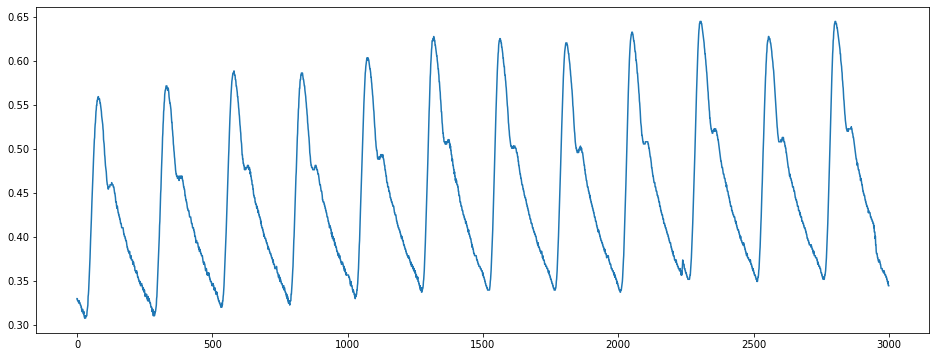

In [ ]:
ex_signal = bp_signal[0:3000]


#and visualise
plt.figure(figsize=(16,6))
plt.plot(ex_signal)
plt.show()

c:\users\pek\appdata\local\programs\python\python36\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


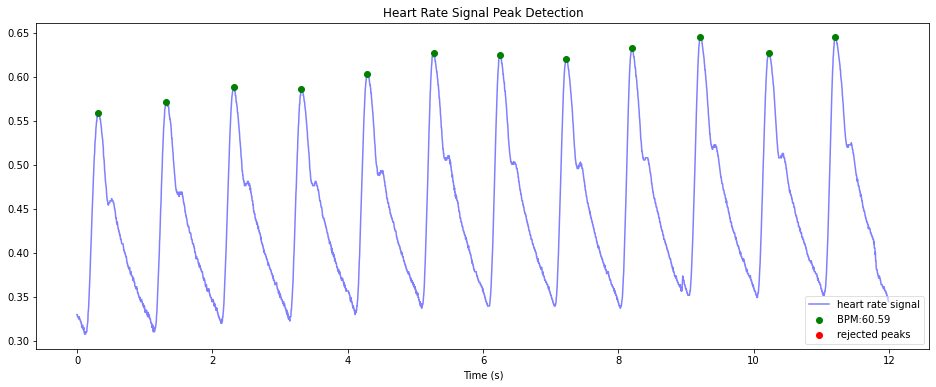

In [ ]:
#run the analysis
wd, m = hp.process(ex_signal, sample_rate = info['fs'])



#call plotter
hp.plotter(wd, m,figsize = (16,6))

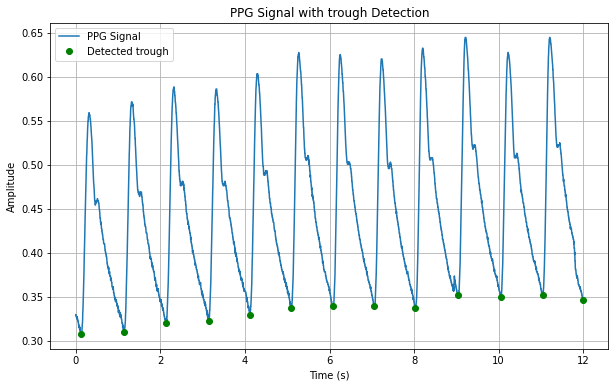

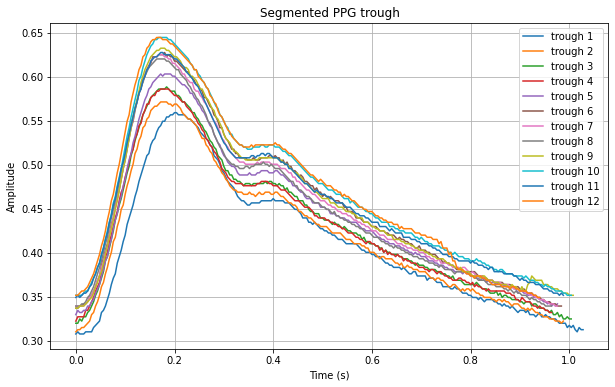

In [ ]:

fs = info['fs']  # Sampling frequency (Hz)
t = np.arange(0, round(len(ex_signal)/fs), 1/fs)  # Time vector
ppg_signal = ex_signal

# Find trough in the inverted PPG signal
trough, _ = find_peaks(-ppg_signal,distance=fs//2)

# Plot the original signal and the detected trough
plt.figure(figsize=(10, 6))
plt.plot(t, ppg_signal, label='PPG Signal')
plt.plot(t[trough], ppg_signal.iloc[trough], 'go', label='Detected trough')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('PPG Signal with trough Detection')
plt.legend()
plt.grid()
plt.show()

# Calculate the intervals between trough
trough_intervals = np.diff(t[trough])

# Segment the PPG signal based on valley intervals
segments = []
for i in range(len(trough) - 1):
    segment = ppg_signal[trough[i]:trough[i + 1]]
    segments.append(segment)

# Plot each segmented wave (valley)
plt.figure(figsize=(10, 6))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Segmented PPG trough')
for i, segment in enumerate(segments):
    plt.plot(np.arange(0, len(segment))/fs, segment, label=f'trough {i + 1}')
plt.legend()
plt.grid()
plt.show()